<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/Euler_sin_ntheta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>$\sin(n\theta)$</h1></b>

Dr. Bingsen Wang

2/8/2025
</center>

#Python Code

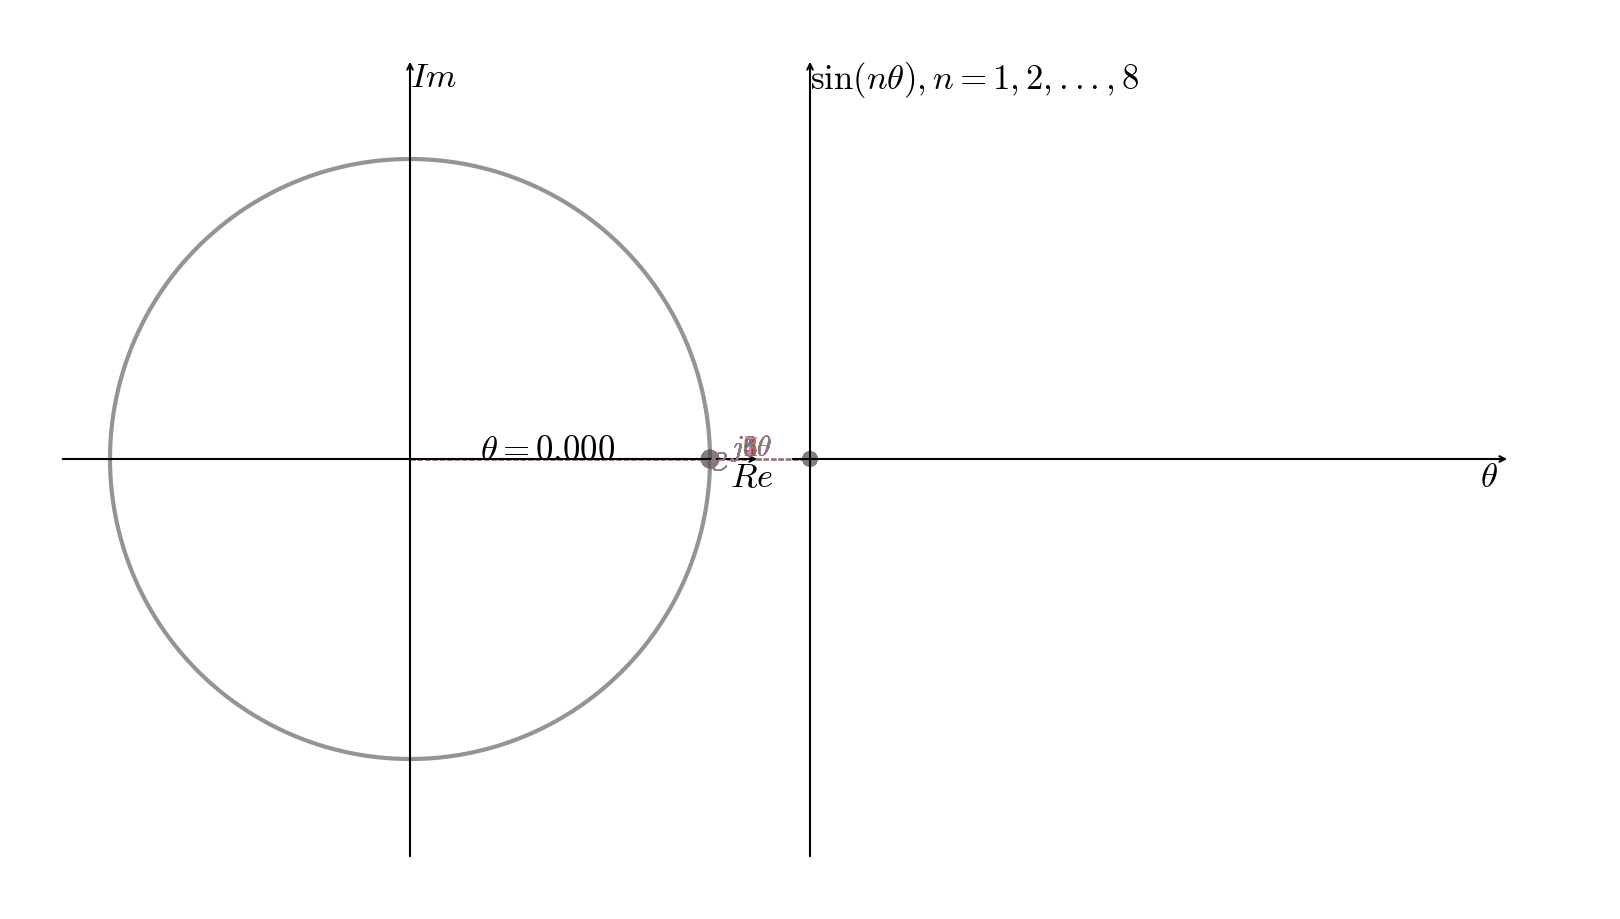

In [42]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nl,Nf,r,x0,y0 = 8,1500,3,[4,8],4.5
n = np.linspace(1,Nl,Nl)
theta=np.linspace(0,np.pi*2,Nf)
cr = r*np.exp(1j*theta)+x0[0]+1j*y0
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([16,9]))
ax = fig.add_axes([0,0,1,1],xlim=[0,16],ylim=[0,9])
ax.axis('off')
ax.plot(cr.real,cr.imag,lw=3,c='0.3',alpha=.6)
[ax.annotate('',(x0[i]+[3.5,7][i],y0),(x0[i]+[-3.5,-.2][i],y0),arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(2)]
[ax.annotate('',(x0[i],y0+4),(x0[i],y0-4),arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(2)]
[ax.text([x0[0],x0[0]+3.2,x0[1],x0[1]+6.7][i],[y0+4,y0,y0+4,y0][i],
 ['$Im$','$Re$',rf'$\sin(n\theta),n=1,2,...,{Nl}$',r'$\theta$'][i],size=25,va='top') for i in range(4)]
sc=[ax.scatter(n*0,n*0,marker='o',c=clst[:len(n)],s=[150,100][k]) for k in range(2)]
lines=[[ax.plot([],[],ls=['--','-'][k],lw=[1,4-2.5*i/(Nl-1)][k],c=clst[i])[0] for i in range(Nl)] for k in range(2)]
lines.append(ax.plot([],[],lw=1,c='k')[0])
txt = [ax.text(0,0,'',c=clst[i],size=30,ha='center',va='center') for i in range(Nl)]
txt.append(ax.text(0,0,'',c='k',size=25))
def animate(k):
  ejnt = r*np.exp(1j*theta[k]*n)
  ejt,ejt1 = .5*np.exp(1j*theta[:k+1]),.7*np.exp(1j*theta[k]/2)
  sinnt = [y0+r*np.sin(n[i]*theta[:k+1]) for i in range(Nl)]
  sc[0].set_offsets(np.c_[ejnt.real+x0[0],ejnt.imag+y0])
  sc[1].set_offsets(np.c_[theta[k]+x0[1]+ejnt.real*0,ejnt.imag+y0])
  [lines[0][i].set_data([x0[0],ejnt[i].real+x0[0],theta[k]+x0[1]],
   [y0,ejnt[i].imag+y0,ejnt[i].imag+y0]) for i in range(Nl)]
  [lines[1][i].set_data(x0[1]+theta[:k+1],sinnt[i]) for i in range(Nl)]
  lines[2].set_data(x0[0]+ejt.real,y0+ejt.imag)
  [txt[i].set_text(fr'$e^{{j{n[i]:.0f}\theta}}$') for i in range(Nl)]
  [txt[i].set_position((x0[0]+1.1*ejnt[i].real,y0+1.1*ejnt[i].imag)) for i in range(Nl)]
  txt[Nl].set_position((x0[0]+ejt1.real,y0+ejt1.imag))
  txt[Nl].set_text(fr'$\theta={theta[k]:.3f}$')
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("Euler_sin_ntheta.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)